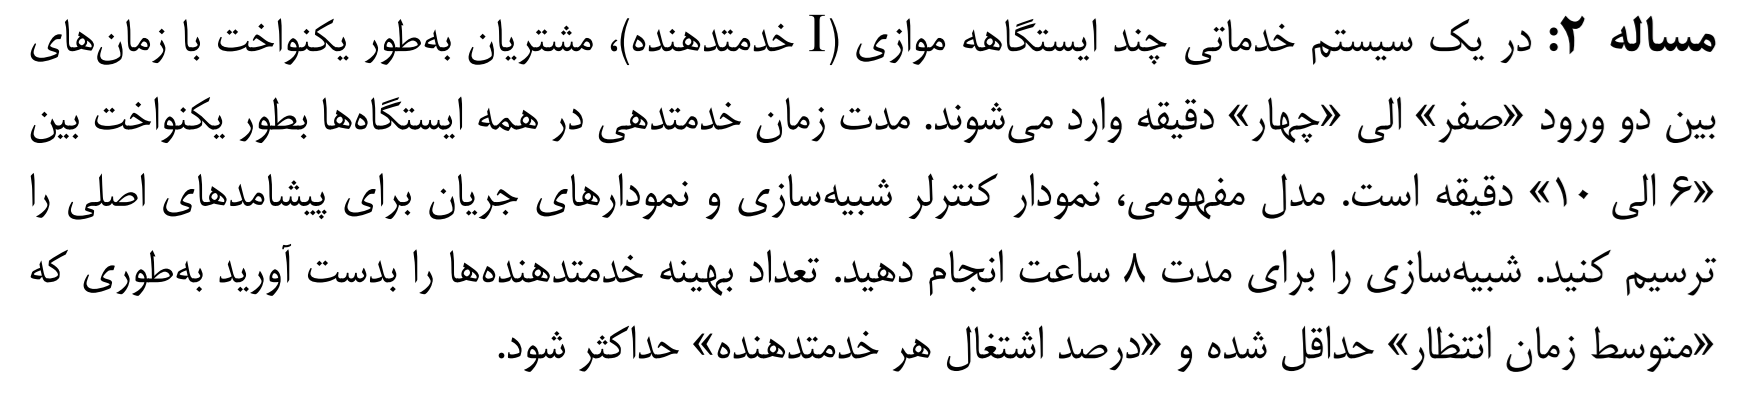

In [1]:
from IPython.display import Image, display
display(Image(filename="C:/Users/USER/Desktop/service.png"))

In [31]:
from random import randint
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

class Srv_Simulation:
    def __init__(self,num_servers):
        self.fel=[[0,0]] # فرض ساده ساز ورود در زمان صفر است 
        self.fel_total=[[0,0]] #لیست تمامی پیشامدها
        self.T = 8*60 #مدت شبیه سازی
        self.Tnow = 0.0 #ساعت شبیه سازی
        self.list_Tnow=[]  #لیستی که زمان های فعلی را ذخیره می کند
        self.last_event_time=0 #tnow قبلی
        self.Mtot = 0 #تعداد کل مشتریان
        self.s=np.zeros((num_servers)) #وضعیت خدمت دهنده ها را با 0و1 نشان می دهد 
        self.ST_cumulative = 0 # زمان خدمت دهی سرویس 
        self.list_ST_cumulative=[]
        self.list_code=[] # لیست کدها
        self.N = 0 #تعداد افرادی که خدمت دریافت کرده اند  
        self.Q = 0 #تعداد افراد منتظر در صف
        self.Twt = 0.0  #  ذخیره کل زمان انتظار
        self.num_wt=0 # تعداد افرادی که در کل در صف ماندند
        
 
    def arrival(self):
        self.Mtot += 1 #افزایش کل مشتریان با ورود
        self.at= self.generate_interarrival_time()
        self.fel.append([0, self.Tnow + self.at])#برنامه ریزی برای ورود بعدی
        self.fel_total.append([0, self.Tnow + self.at])
        
        for i in range(len(self.s)): #به تعداد خدمت دهنده ها حلقه ایجاد می شود
            if self.s[i] == 0:
                # اگر عضو صفر بود، به یک تبدیل می شود
                self.s[i] = 1
                self.ST = self.generate_service_time()
                self.fel.append([1, self.Tnow + self.ST])#برنامه ریزی برای خروجی بعدی
                self.fel_total.append([1, self.Tnow + self.ST])
                break
            elif self.s[i] == 1:
                # اگر عضو یک بود، ادامه می دهد تا به صفر برسد و آن را یک کند
                continue

        else: #اگر عضو صفر وجود نداشت
            self.Twt += self.Q * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.Q += 1 # به صف یک نفر اضافه می شود
            self.num_wt += 1 #به کل افراد مانده درصف نیز اضافه می شود
            self.last_event_time = self.Tnow
            
            
    def server(self): 
        self.N += 1 
        if self.Q > 0: #اگر صف وجود داشته باشد
            self.ST_cumulative += self.ST #افزایش زمان تجمعی خدمت دهی
            self.ST = self.generate_service_time()#تولید زمان خدمت دهی
            self.list_ST_cumulative.append(self.ST_cumulative)
            
            self.fel.append([1, self.Tnow + self.ST])#برنامه ریزی برای خروجی بعدی
            self.fel_total.append([1, self.Tnow + self.ST])
            
            self.Twt += self.Q * (self.Tnow - self.last_event_time) #اگر صف باشد، به زمان انتظار اضافه می شود
            self.last_event_time = self.Tnow            
            self.Q -= 1 # از صف یک نفر کم می شود

            
        else :#اگر صف نباشد
            for i in range(len(self.s)): #به تعداد خدمت دهنده ها حلقه ایجاد می شود
                if self.s[i] == 1:       # اگر عضو صفر بود، آن را به یک تبدیل کند
                    self.s[i] = 0
                    break
                elif self.s[i] == 0:   # اگر عضو یک بود، ادامه دهد تا به صفر برسد و آن را یک کند
                    continue
    def generate_interarrival_time(self): # تولید زمان بین دو ورود
        return np.random.uniform(low=0,high=4)

    def generate_service_time(self): # تولید زمان خدمت دهی
        return np.random.uniform(low=6,high=10)
    
server_utilizations = []
average_wait_times = []

def find_time(list_of_items):#اضافه اضافه کردن زمان خدمت دهی آخرین خدمتدهنده به زمان اشتغال خدمت دهنده ها، در واقع تابعی است که با استفاده از آن زمان اشتغال خدمت دهنده ها را دقیقتر حساب می کنیم
    for item in reversed(list_of_items):
        if item[0] == 1 and item[1] < s.T:
            return item[1]
    return None  
for num_servers in range(1, 11): #حلقه ای برای از 1 تا 10 خدمت دهنده
    s = Srv_Simulation(num_servers)
#این بخش کد،یک حلقه تکراری است که برای1000بار اجرا میشود تا نحوه انتخاب اعداد تصادفی تاثیری بر نتایج نداشته باشد
    for i in range(1000):
        np.random.seed(i)
        while True :
            s.fel.sort(key=lambda x: x[1]) # سورت کردن لیست پیشامدها
            s.Tnow=s.fel[0][1]#جلو بردن ساعت شبیه سازی
            if s.Tnow > s.T: #شرط توقف
                break
            type_event=s.fel[0][0] #تعیین نوع پیشامد
            s.list_code.append(type_event) #اضافه کردن نوع پیشامد به لیست کدها
            del s.fel[0] #بیرون کشیدن پیشامد اجرا شده از لیست پیشامدها
            if type_event==0:#ورود:0
                s.arrival()
            elif type_event==1:#پایان خدمتدهی:1
                s.server()
    s.ST_cumulative+=s.Tnow-find_time(s.fel_total)#اضافه کردن زمان خدمت دهی آخرین خدمتدهنده به زمان اشتغال خدمت دهنده ها
    server_utilizations.append(s.ST_cumulative/(len(s.s)*(s.Tnow))*100) #لیست زمان های مشغول بودن سرور
    average_wait_times.append(s.Twt / s.Mtot) #لیست زمان های انتظار
    
#print(s.fel_total)
#print(server_utilizations)
#print("                                        ")
#print(average_wait_times)

free = [100 - x for x in server_utilizations] # زمان بیکاری

#هم مقیاس سازی نرمال
#normalized_utilizations1 = normalize([server_utilizations])
#flattened_utilizations = normalized_utilizations1.flatten()
#normalized_utilizations = flattened_utilizations.tolist()
#normalized_wt1 =normalize([average_wait_times])
#flattened_wt = normalized_wt1.flatten()
#normalized_wt = flattened_wt.tolist()
#normalized_free1 = normalize([free])
#flattened_free = normalized_free1.flatten()
#normalized_free = flattened_free.tolist()
        

def min_max_scaling(lst):#min-max scaler برای اسکیل کردن داده ها
    min_val = min(lst)
    max_val = max(lst)
    scaled_lst = [(x - min_val) / (max_val - min_val) for x in lst]
    return scaled_lst
minmax_utilizations = min_max_scaling(server_utilizations) #اشتغال
minmax_wt = min_max_scaling(average_wait_times)#انتظار
minmax_free=min_max_scaling(free) #بیکاری

i=[1,2,3,4,5,6,7,8,9,10]
df = pd.DataFrame({'number of server':i, 'average_wait_times': average_wait_times, 'server_utilizations': server_utilizations})
print(df)

   number of server  average_wait_times  server_utilizations
0                 1          178.446928           100.000000
1                 2          119.294247            99.047208
2                 3           47.648224            98.820471
3                 4            2.828153            63.521733
4                 5            0.905763            28.467498
5                 6            0.147787             7.213883
6                 7            0.049516             2.810123
7                 8            0.000710             0.375444
8                 9            0.000000             0.108504
9                10            0.000000             0.097653


 آبی:متوسط زمان انتظار
 قرمز:متوسط زمان بیکاری خدمت دهنده ها
جواب بهینه عددی بین 3 و 4 است


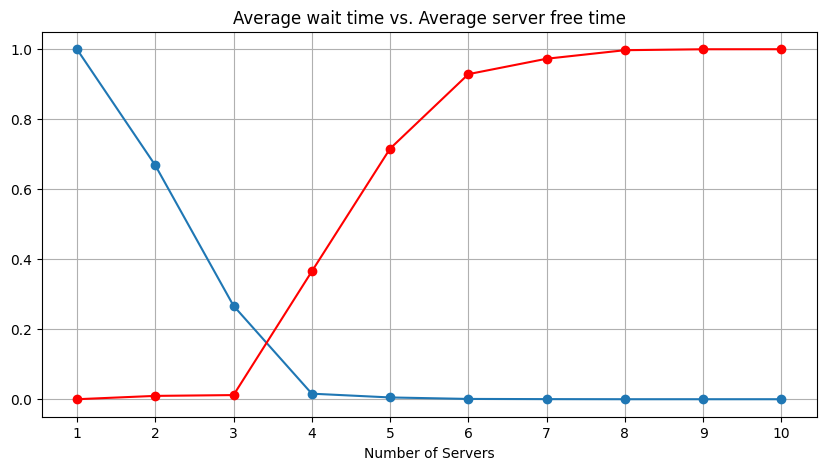

با توجه به نمودار و هدف حداکثر کردن اشتغال خدمت دهنده ها و حداقل کردن زمان انتظار، تعداد خدمت دهنده بهینه عددی بین 3 و 4 است


In [29]:
i=[1,2,3,4,5,6,7,8,9,10] #تعداد خدمت دهنده ها
print(' آبی:متوسط زمان انتظار')
print(' قرمز:متوسط زمان بیکاری خدمت دهنده ها')
print("جواب بهینه عددی بین 3 و 4 است")
plt.figure(figsize=(10, 5))
plt.plot(i, minmax_wt, marker='o') #نمایش متوسط زمان انتظار
plt.title('Average wait time vs. Average server free time')
plt.xlabel('Number of Servers')
plt.xticks(np.arange(min(i), max(i)+1,1))
plt.plot(i, minmax_free, marker='o', color='red') #نمایش متوسط زمان بیکاری
plt.grid(True)
plt.show()
print("با توجه به نمودار و هدف حداکثر کردن اشتغال خدمت دهنده ها و حداقل کردن زمان انتظار، تعداد خدمت دهنده بهینه عددی بین 3 و 4 است")

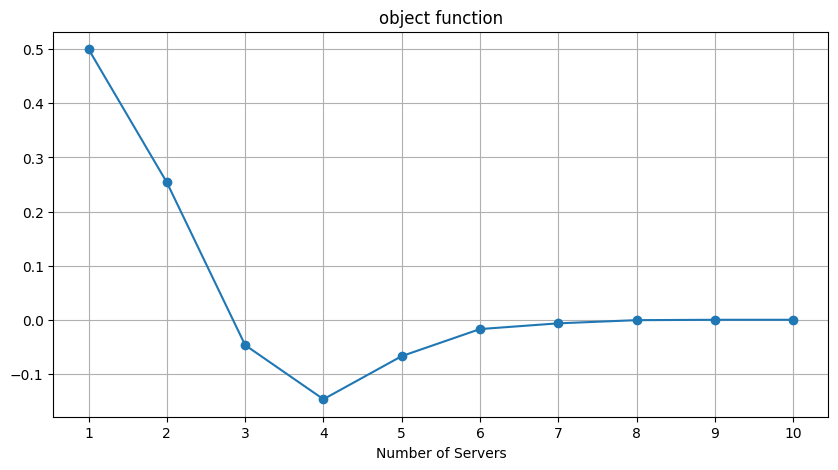

In [23]:
weightSVR=0.25
weightWT=0.75
objective = [-weightSVR * u + weightWT * wt for u, wt in zip(minmax_utilizations, minmax_wt)]
i=[1,2,3,4,5,6,7,8,9,10] #تعداد خدمت دهنده ها
plt.figure(figsize=(10, 5))
plt.plot(i, objective, marker='o')
plt.title('object function')
plt.xlabel('Number of Servers')
plt.xticks(np.arange(min(i), max(i)+1,1))
plt.grid(True)
plt.show()
#تعداد بهینه خدمت دهنده 4تا است

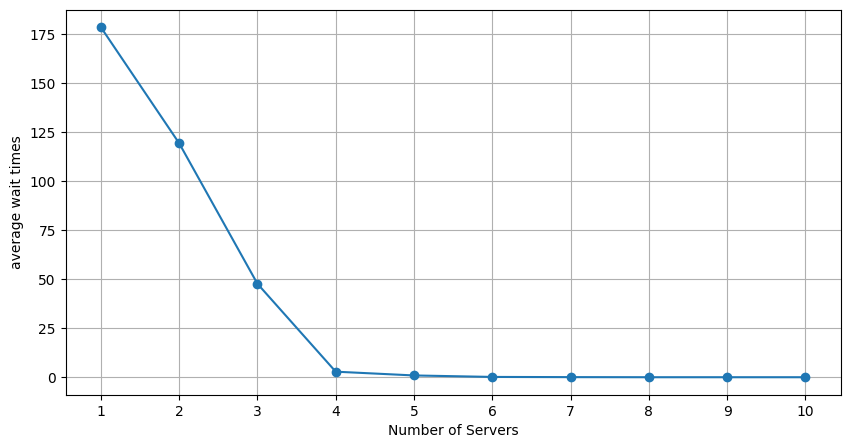

In [24]:
i=[1,2,3,4,5,6,7,8,9,10] #تعداد خدمت دهنده ها
plt.figure(figsize=(10, 5))
plt.plot(i, average_wait_times, marker='o')
#plt.title('Average wait time vs. Average server free time')
plt.xlabel('Number of Servers')
plt.xticks(np.arange(min(i), max(i)+1,1))
plt.ylabel('average wait times')

plt.grid(True)
plt.show()

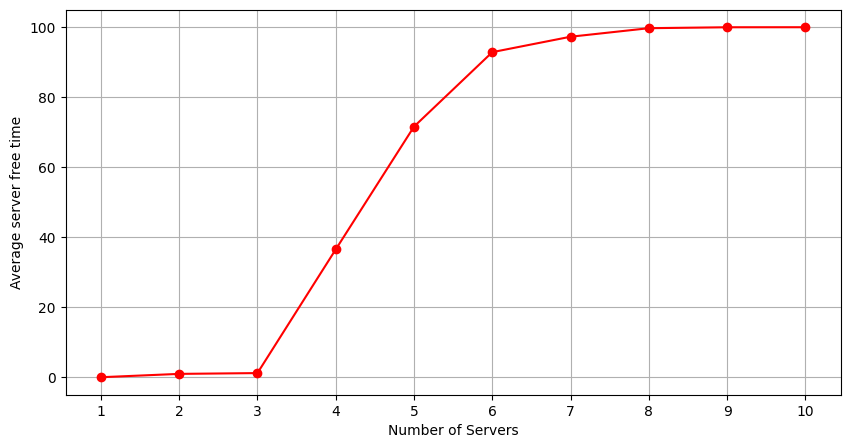

In [25]:
i=[1,2,3,4,5,6,7,8,9,10] #تعداد خدمت دهنده ها
plt.figure(figsize=(10, 5))
plt.xlabel('Number of Servers')
plt.xticks(np.arange(min(i), max(i)+1,1))
plt.plot(i, free, marker='o', color='red', label='Server Utilization')
plt.ylabel('Average server free time')
plt.grid(True)
plt.show()

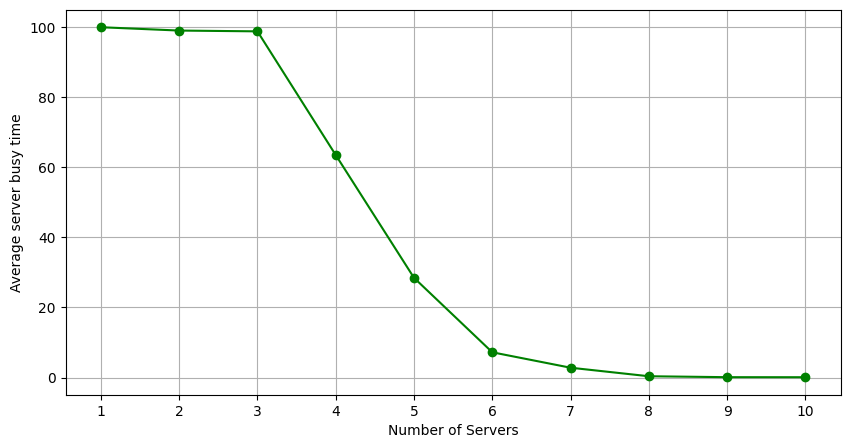

In [26]:
i=[1,2,3,4,5,6,7,8,9,10] #تعداد خدمت دهنده ها
plt.figure(figsize=(10, 5))
plt.xlabel('Number of Servers')
plt.xticks(np.arange(min(i), max(i)+1,1))
plt.plot(i, server_utilizations, marker='o', color='green', label='Server Utilization')
plt.ylabel('Average server busy time')
plt.grid(True)
plt.show()